<h1><center> Project - Regression Models </center> </h1>
<h2><center> COMPSCI X415.2 Intro to Data Science </center> </h2>
<h2><center> UC Berkeley - Extension </center> </h2>
<h3><center>    Prashant Chopalli </center> </h3>


## Introduction
The dataset contains house sale prices for King County. The data has information about homes sold between May 2014 and May 2015. The house sales prices are affected by the size of the house(square footage), bathrooms, berdrooms, built/quality, year built, zipcode etc. 

### Research Questions ###
+ Estimate the sale/buying prices for houses




<h3> Data Source </h3>

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


+ id (numeric) - Id of the sale listing
+ date : Date house was sold
+ price : Selling price of the house(Target Variable)
+ bedrooms: No of Bedrooms 
+ bathrooms: No of Bathrooms
+ sqft_living: Total living space in sqft
+ sqft_lot: Square for of the home
+ floors: No of floors
+ waterfront: Waterfront(Yes or No)
+ view: Has the house been viewed
+ condition: Overall condition of the house
+ grade: Grading assigned to the house by the county
+ sqft_above: Square footage of house excluding basement
+ sqft_basement: Square footage of basement
+ yr_built: year house is built
+ yr_renovated: year of renovation
+ zipcode: zipcode of the house location
+ lat: lattitude of house
+ long: longitude of house
+ sqft_living15:  Living room area in 2015    
+ sqft_lot15:  LotSize area in 2015

<p> <a href="https://www.kaggle.com/harlfoxem/housesalesprediction">Original Data Source from Kaggle.</a></p>

## Data Description

In [43]:
# Import the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

In [2]:
# Read the data file
df=pd.read_csv('house_data.csv')

In [3]:
# Display the first 5 entries of the dataframe
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [5]:
# Display the rows and columns of the dataframe 
df.shape

(21613, 21)

In [6]:
# Check if the target variable has any null values
df['price'].isnull().value_counts()

False    21613
Name: price, dtype: int64

In [7]:
# Numerical summaries of the features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [8]:
# Show the datatypes of the columns
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
# Display the columns
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
# Check to see if the features have any null values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Correlation Coefficient for some of the feature variables. To check how much of the vairability in target can be described by the feature variable

In [11]:
corr, _ = pearsonr(df['grade'],df['price'])
print(corr*corr*100)
corr, _ = pearsonr(df['bathrooms'],df['price'])
print(corr*corr*100)
corr, _ = pearsonr(df['bedrooms'],df['price'])
print(corr*corr*100)
corr, _ = pearsonr(df['sqft_living'],df['price'])
print(corr*corr*100)
corr, _ = pearsonr(df['sqft_above'],df['price'])
print(corr*corr*100)

44.54684861092873
27.576939959239894
9.507947467657658
49.28532179037931
36.671175283827935


### Graphical Summaries

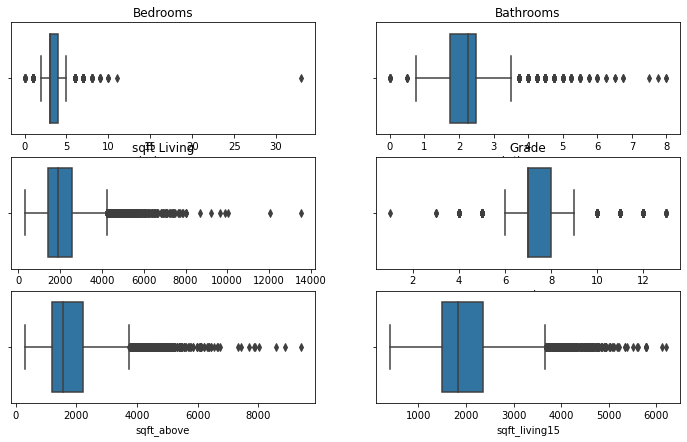

In [15]:
%matplotlib inline
fig,ax=plt.subplots(3,2,figsize=(12,7))
sns.boxplot(ax=ax[0,0],x='bedrooms',data=df)
ax[0,0].set_title('Bedrooms')
sns.boxplot(ax=ax[0,1],x='bathrooms',data=df)
ax[0,1].set_title('Bathrooms')
sns.boxplot(ax=ax[1,0],x='sqft_living',data=df)
ax[1,0].set_title('sqft Living')
sns.boxplot(ax=ax[1,1],x='grade',data=df)
ax[1,1].set_title('Grade')
sns.boxplot(ax=ax[2,0],x='sqft_above',data=df)
# ax[2,0].set_title('sqft_above')
sns.boxplot(ax=ax[2,1],x='sqft_living15',data=df)
# ax[2,1].set_title('sqft_living15')
plt.show()

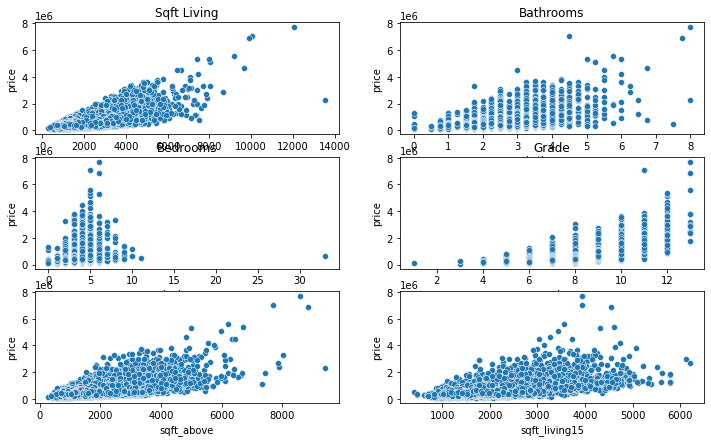

In [16]:
%matplotlib inline
fig,ax=plt.subplots(3,2,figsize=(12,7))
sns.scatterplot(ax=ax[0,0],x='sqft_living',y='price',data=df)
ax[0,0].set_title('Sqft Living')
sns.scatterplot(ax=ax[0,1],x='bathrooms',y='price',data=df)
ax[0,1].set_title('Bathrooms')
sns.scatterplot(ax=ax[1,0],x='bedrooms',y='price',data=df)
ax[1,0].set_title('Bedrooms')
sns.scatterplot(ax=ax[1,1],x='grade',y='price',data=df)
ax[1,1].set_title('Grade')
sns.scatterplot(ax=ax[2,0],x='sqft_above',y='price',data=df)
# ax[2,0].set_title('sqft_above')
sns.scatterplot(ax=ax[2,1],x='sqft_living15',y='price',data=df)
# ax[2,1].set_title('sqft_living15')
plt.show()



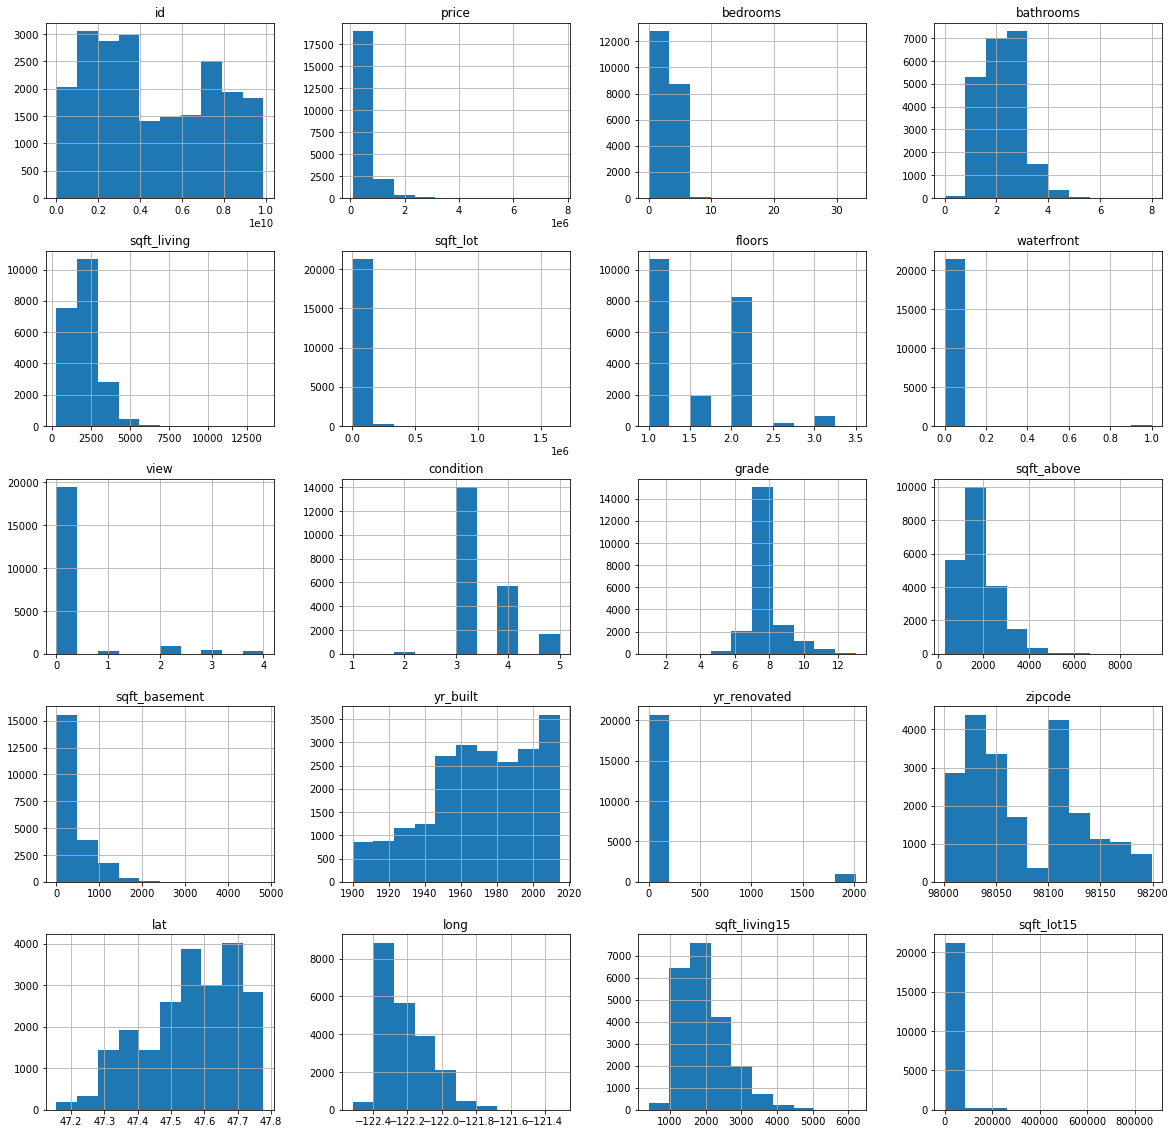

In [17]:
# Display histogram for the features
%matplotlib inline
df.hist(figsize=(20,20))
# sns.distplot(df['sqft_living'],hist=True)
plt.show()

#### Observations from the data analysis
<p> Sqft Living has lot of outliers value</p>
<p> The feature variables are not strongly correlated with target as the Corr Coeff is not more than 50 </p> 


#### Check the multi collinearity using the correlation between the feature variables 

In [18]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


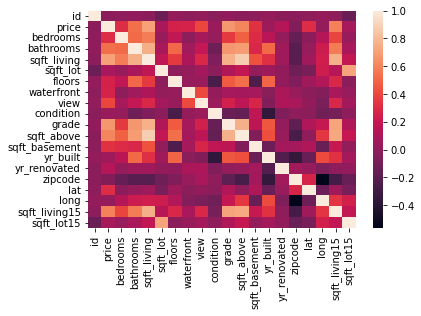

In [19]:
# Heatmap for Correlation between feature variables
%matplotlib inline
fig=figsize=(10,10)
sns.heatmap(df.corr())
plt.show(fig)

#### Prepare the dataset
<p></p>

In [20]:
# Divide the data into dataset with relevant features and dataset for taget variable.
x=df[['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15']]
y=df[['price']]

drop sqft_above as correltion is high with sqft_living

In [21]:
type(x)

pandas.core.frame.DataFrame

### Simple Linear Regression Algorithm

In [22]:
from sklearn.linear_model import LinearRegression

# Split the data into training and test data. Test data is 20% of the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
lm = LinearRegression()
# Scale the data
scaler = StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
# Fit the training data
lm.fit(x_train,y_train)
ypred=lm.predict(x_test)
# Scores for the test data
print('Accuracy of training data',lm.score(x_train,y_train))
print('Accuracy of test data with',lm.score(x_test,y_test))


Accuracy of training data 0.6965701648737419
Accuracy of test data with 0.7103360727034473


#### Observation
Accuracy of 70% is achieved with Linear Regression

### Linear Regression using Cross validation technique 

In [23]:
# Declare the claffifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Use a Kfold with 10 splits
cv=KFold(n_splits=10, random_state=2, shuffle=True)
# Max depth is 5 nodes
lm = LinearRegression()
scores=cross_val_score(lm,x_train,y_train,cv=cv,n_jobs=-1)
print(scores)
print("Avg score is ",np.mean(scores))

[0.68876802 0.71391018 0.67630434 0.69441418 0.67709574 0.68323335
 0.7256506  0.69020147 0.71069416 0.67658768]
Avg score is  0.6936859729337185


#### Observation
Accuracy of 69% is achieved with Cross validation and it didn't improved

### Model Improvement - Ridge Regression

In [24]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

rr = Ridge(alpha=0.01)
rr.fit(x_train,y_train)
ypred=rr.predict(x_test)

In [25]:
print('Accuracy of training data',rr.score(x_train,y_train))
print('Accuracy of test data with',rr.score(x_test,y_test))

Accuracy of training data 0.6965701648735809
Accuracy of test data with 0.7103360483638692


#### Ridge regression using cross valiation tehcniques

In [26]:
# Declare the claffifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Use a Kfold stratification with 10 splits
cv=KFold(n_splits=10, random_state=2, shuffle=True)
# Max depth is 5 nodes
rr = Ridge()
scores=cross_val_score(rr,x_train,y_train,cv=cv,n_jobs=-1,scoring='explained_variance')
print(scores)
print("Avg score is ",np.mean(scores))


[0.69073323 0.7139291  0.67641921 0.69464391 0.67716369 0.68370747
 0.72584406 0.68926595 0.71108878 0.67698333]
Avg score is  0.6939778725521268


### Grid Search to tune hyper paramters 

In [27]:
model = Ridge()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='explained_variance',error_score=0)
grid_result = grid_search.fit(x_train,y_train)
# summarize results
print(grid_result.best_score_)
print(grid_result.best_params_)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\cp_mu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\cp_mu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\cp_mu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


0.695065570485954
{'alpha': 1.0}
Best: 0.695066 using {'alpha': 1.0}
0.695065 (0.020411) with: {'alpha': 0.1}
0.695065 (0.020411) with: {'alpha': 0.2}
0.695065 (0.020411) with: {'alpha': 0.3}
0.695065 (0.020412) with: {'alpha': 0.4}
0.695065 (0.020412) with: {'alpha': 0.5}
0.695065 (0.020412) with: {'alpha': 0.6}
0.695065 (0.020412) with: {'alpha': 0.7}
0.695065 (0.020412) with: {'alpha': 0.8}
0.695065 (0.020412) with: {'alpha': 0.9}
0.695066 (0.020412) with: {'alpha': 1.0}


#### Observation
Accuracy of ~ 69% is achieved with Ridge regression and tuning the alpha values

### Lasso Regression 

In [28]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

ls = Lasso(alpha=1.0)
ls.fit(x_train,y_train)
ypred=ls.predict(x_test)
print('Accuracy of training data',ls.score(x_train,y_train))
print('Accuracy of test data with',ls.score(x_test,y_test))

Accuracy of training data 0.6965701645583185
Accuracy of test data with 0.7103368473792284


C:\Users\cp_mu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.140e+13, tolerance: 2.291e+11
  model = cd_fast.enet_coordinate_descent(


#### Lasso Regression with cross validation techniques

In [29]:
# Declare the claffifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Use a Kfold stratification with 10 splits
cv=KFold(n_splits=10, random_state=2, shuffle=True)
# Max depth is 5 nodes
scores=cross_val_score(rr,x_train,y_train,cv=cv,n_jobs=-1,scoring='explained_variance')
print(scores)
print("Avg score is ",np.mean(scores))

[0.69073323 0.7139291  0.67641921 0.69464391 0.67716369 0.68370747
 0.72584406 0.68926595 0.71108878 0.67698333]
Avg score is  0.6939778725521268


#### Grid search using Lasso Regression

In [30]:
model = Lasso()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='explained_variance',error_score=0)
grid_result = grid_search.fit(x_train,y_train)
# summarize results
print(grid_result.best_score_)
print(grid_result.best_params_)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


C:\Users\cp_mu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\cp_mu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\cp_mu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


0.6950647305228154
{'alpha': 0.1}
Best: 0.695065 using {'alpha': 0.1}
0.695065 (0.020411) with: {'alpha': 0.1}
0.695065 (0.020411) with: {'alpha': 0.2}
0.695065 (0.020411) with: {'alpha': 0.3}
0.695065 (0.020411) with: {'alpha': 0.4}
0.695065 (0.020411) with: {'alpha': 0.5}
0.695065 (0.020411) with: {'alpha': 0.6}
0.695065 (0.020411) with: {'alpha': 0.7}
0.695065 (0.020411) with: {'alpha': 0.8}
0.695065 (0.020411) with: {'alpha': 0.9}
0.695065 (0.020411) with: {'alpha': 1.0}


C:\Users\cp_mu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.139e+13, tolerance: 2.291e+11
  model = cd_fast.enet_coordinate_descent(


In [31]:
# from sklearn.feature_selection import SelectFromModel
# lms=LinearRegression()
# selector=SelectFromModel(estimator=LinearRegression())
# selector.fit(x_train,y_train)
# selector.get_support()

array([False, False,  True, False, False,  True,  True, False,  True,
        True, False,  True, False, False,  True, False, False, False])

## Random Forest 

In [32]:
# Model Training using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,np.ravel(y_train))
print(rf.score(x_train,y_train))
print(rf.score(x_test,y_test))

0.9820934312211151
0.8758743603234463


In [40]:
# Gradient Boosting model
from sklearn.ensemble import GradientBoostingRegressor
gr=GradientBoostingRegressor(random_state=42)
gr.fit(x_train,np.ravel(y_train))
print(gr.score(x_train,y_train))
print(gr.score(x_test,y_test))

0.9002139151153301
0.879195161924477


In [64]:
from sklearn.metrics import mean_squared_error
ypred_gr=gr.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,ypred_gr)))

131779.47979619607


We will use Feature Engineering to see if model accuracy is improved

In [33]:
rf.feature_importances_

array([0.00298509, 0.00801499, 0.24931055, 0.01326232, 0.00177601,
       0.02812065, 0.01168886, 0.00263407, 0.32032223, 0.02772681,
       0.0061206 , 0.02565566, 0.0018404 , 0.01325527, 0.16769513,
       0.07237137, 0.03405505, 0.01316493])

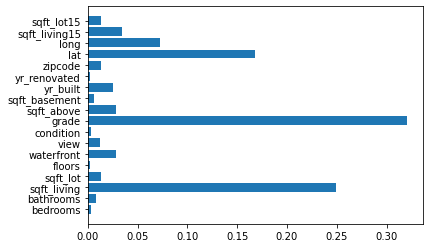

In [34]:
%matplotlib inline
xp=x.columns
yp=rf.feature_importances_
plt.barh(xp,yp)
plt.show()
    

In [35]:
# Drop the least important features
xf=x.drop(columns=['bedrooms', 'bathrooms', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'sqft_above',
                   'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','sqft_living15', 'sqft_lot15'])

yf=df[['price']] 

In [36]:
xf.columns

Index(['sqft_living', 'grade', 'lat', 'long'], dtype='object')

In [37]:
xf_train,xf_test,yf_train,yf_test=train_test_split(xf,yf,test_size=0.2)
lmf=LinearRegression()

In [38]:
scaler.fit(xf_train)
xf_train=scaler.transform(xf_train)
xf_test=scaler.transform(xf_test)
lmf.fit(xf_train,yf_train)
print("Training accuracy",lmf.score(xf_train,yf_train))
print("Testing accuracy",lmf.score(xf_test,yf_test))

Train 0.6138662044362545
Test 0.5940946177252


In [58]:
rff=RandomForestRegressor()
rff.fit(xf_train,yf_train)
print("Training accuracy with Feature engg.", rff.score(xf_train,yf_train))
print(" Test accuracy with Feature engg.",rff.score(xf_test,yf_test))

C:\Users\cp_mu\AppData\Local\Temp/ipykernel_12320/1353180335.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rff.fit(xf_train,yf_train)


0.9759732393428803
0.8264391945761508


In [60]:
from sklearn.ensemble import GradientBoostingRegressor
grf=GradientBoostingRegressor(random_state=42)
grf.fit(xf_train,np.ravel(yf_train))
print(grf.score(xf_train,yf_train))
print(grf.score(xf_test,yf_test))

0.8508231645708537
0.8070007588063789
